<a href="https://colab.research.google.com/github/Muntasir2179/pytorch-learnig/blob/custom-dataset/04_pytorch_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing PyTorch and setting up device-agnostic code

In [1]:
!pip install torchinfo

In [2]:
import torch
from torch import nn
torch.__version__

'2.1.0+cu118'

In [3]:
# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Getting some data for our FoodVision project

In [4]:
import requests
import zipfile
from pathlib import Path

# setup path to a data folder
data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'

# if the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} dicectory already exist.....skipping download")
else:
  print(f"{image_path} does not exist, creating one....")
  image_path.mkdir(parents=True, exist_ok=True)

# download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print(f"Downloading pizza, steak and sushi data....")
  f.write(request.content)

# unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data....")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist, creating one....
Unzipping pizza, steak and sushi data....


# Becoming one with the data (data preparation and data exploration)

In [5]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [6]:
walk_through_dir(image_path)

there are 2 directories and 0 images in 'data/pizza_steak_sushi'.
there are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
there are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
there are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
there are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
there are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
there are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
there are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
there are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.


In [7]:
# setup train and testing paths
train_dir = image_path / 'train'
test_dir = image_path / 'test'
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

# visualizing images from the dataset

1. Get all the image path.
2. Pick a random image path using Python's random.choice()
3. Get the image class name using pathlib.Path.parent.stem
4. Since we're working with images, let's open the image with Python's PIL.
5. We'll then show the image and print metadata.

Random image path: data/pizza_steak_sushi/train/steak/75537.jpg
Image class: steak
Image height: 384
Image width: 512


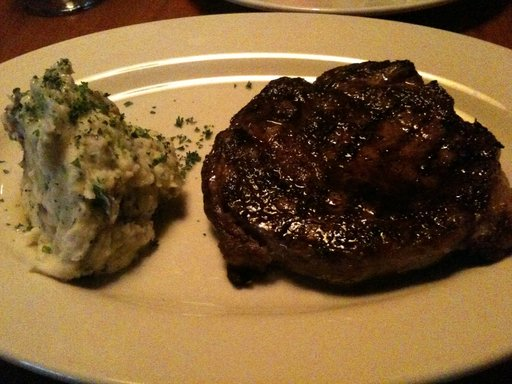

In [8]:
import random
from PIL import Image

# set seed
# random.seed(42)

# get all the image path
# /content/data/pizza_steak_sushi
image_path_list = list(image_path.glob("*/*/*.jpg"))

# pick a random image path
random_image_path = random.choice(image_path_list)

# get the image class from the path name
# the image class is the name of the directory where the image is stored
image_class = random_image_path.parent.stem

# open image
img = Image.open(random_image_path)

# print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

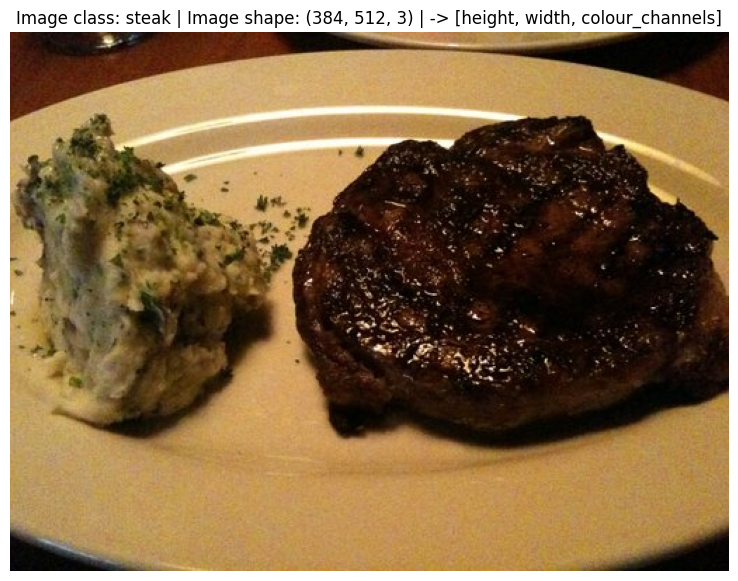

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# turn the image into an array
img_as_array = np.asarray(img)

# plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} | -> [height, width, colour_channels]")
plt.axis(False)
plt.show()

# Transforming data

1. Resizing the image.
2. Fliping the image to create diversed representation.
3. Convert to tensor.

In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [11]:
# writing a transform for image
data_transform = transforms.Compose([
    # resize the images
    transforms.Resize(size=(64, 64)),
    # Fliping the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch tensor
    transforms.ToTensor()
])

In [12]:
data_transform(img)

tensor([[[0.2824, 0.1961, 0.1333,  ..., 0.0196, 0.0275, 0.0627],
         [0.2706, 0.2039, 0.1569,  ..., 0.0235, 0.0471, 0.1216],
         [0.2745, 0.2431, 0.2039,  ..., 0.0510, 0.1216, 0.1882],
         ...,
         [0.0353, 0.0392, 0.0706,  ..., 0.0627, 0.0275, 0.0235],
         [0.0314, 0.0314, 0.0275,  ..., 0.0196, 0.0196, 0.0196],
         [0.0235, 0.0314, 0.0275,  ..., 0.0196, 0.0196, 0.0196]],

        [[0.1098, 0.0863, 0.0706,  ..., 0.0196, 0.0157, 0.0196],
         [0.1059, 0.0784, 0.0627,  ..., 0.0196, 0.0235, 0.0431],
         [0.1059, 0.0941, 0.0824,  ..., 0.0196, 0.0471, 0.0667],
         ...,
         [0.0275, 0.0392, 0.0706,  ..., 0.0392, 0.0196, 0.0157],
         [0.0314, 0.0314, 0.0275,  ..., 0.0196, 0.0157, 0.0118],
         [0.0235, 0.0275, 0.0235,  ..., 0.0196, 0.0157, 0.0157]],

        [[0.0471, 0.0431, 0.0510,  ..., 0.0078, 0.0157, 0.0196],
         [0.0471, 0.0471, 0.0431,  ..., 0.0078, 0.0078, 0.0235],
         [0.0627, 0.0510, 0.0431,  ..., 0.0118, 0.0235, 0.

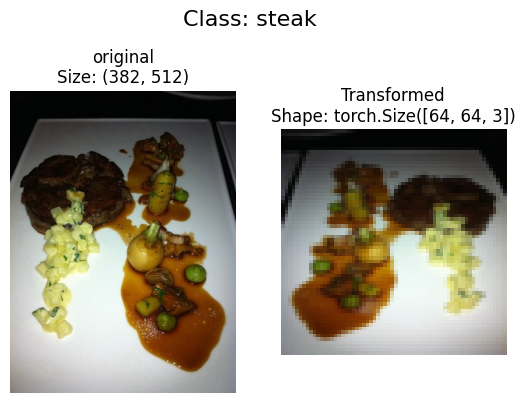

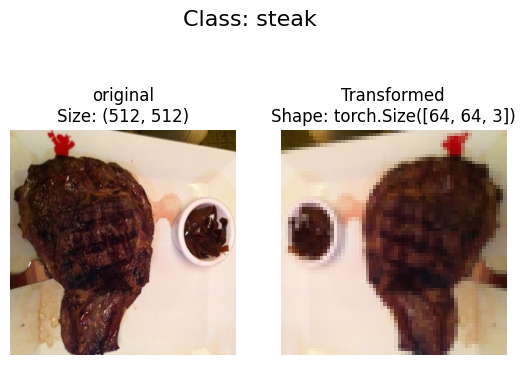

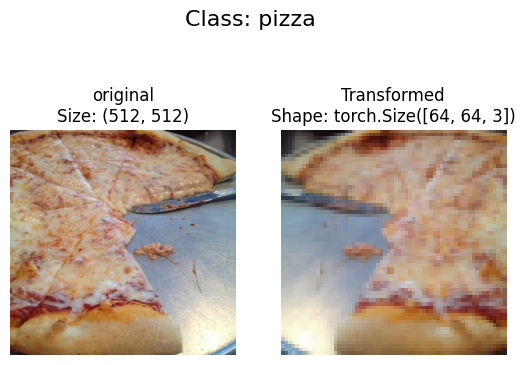

In [13]:
def plot_transformed_images(image_paths: list, transforms, n=3, seed=None):
  """
  Selects random images from a path of images and loads/transforms
  them then plots the original vs the transformed version.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)  # randomply selecting n images form the image paths
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"original\nSize: {f.size}")
      ax[0].axis(False)

      transformed_image = transforms(f).permute(1, 2, 0)

      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transforms=data_transform,
                        n=3,
                        seed=42)

# Loading Image data with ImageFolder

In [14]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,  # transforms for the data
                                  target_transform=None)     # transforms for the target

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [15]:
# get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [16]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [17]:
# check the lengths of our dataset
len(train_data), len(test_data)

(225, 75)

In [18]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [19]:
# Index on the train_data dataset ot get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor: \n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor: 
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.

Original shape: torch.Size([3, 64, 64])
Image permute: torch.Size([64, 64, 3])


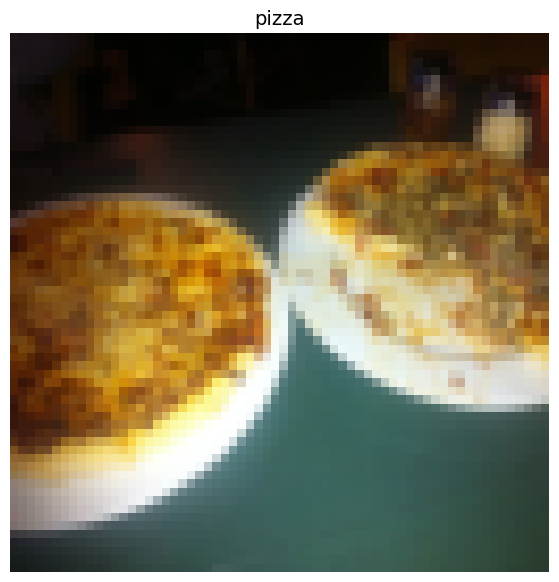

In [20]:
# rearrange the order of the dimensions
img_permute = img.permute(1, 2, 0)

# print out different shapes
print(f"Original shape: {img.shape}")
print(f"Image permute: {img_permute.shape}")

# plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)
plt.show()

# Turn loaded images into DataLoader

In [21]:
batch_size = 1

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=batch_size,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=batch_size,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7aa4ee12b370>,
 <torch.utils.data.dataloader.DataLoader at 0x7aa4ee12bf10>)

In [22]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [23]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape}")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64])
Label shape: torch.Size([1])


# Loading Image data with a custom dataset

1. Want to be able to load images from file.
2. Want to be able to get class names from the Dataset.
3. Want to be able to get classes as dictionary from the Dataset.

Pros:

* Can create a `Dataset` out of anything.
* Not limited to PyTorch pre-build `Dataset` functions.

Cons:

* Even though we could create `Dataset` out of almost anything, it doesn't mean it will work...
* Using a custom `Dataset` often results in us writing more code, which could be prone to errors or performance issues.

In [24]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

## Creating a helper function to get class names

We want a function to:
1. Get the class names using `os.scandir()` to traverse a target directory (the directory is in standard image classification format).
2. Raise an error if the class names are not found (if this happens, there might be something wrong with the directory structure).
3. Turn the class names into a dict and a list and return them.

In [25]:
[entry for entry in list(os.scandir(train_dir))]

[<DirEntry 'steak'>, <DirEntry 'pizza'>, <DirEntry 'sushi'>]

In [26]:
# setup path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# get the class names form the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [27]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Finds the class folder names in a target directory."""
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  if not classes:
    raise FileNotFoundError(f"Could't find any classes in {directory}... please check file structure")

  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [28]:
class_names, class_to_idx = find_classes(target_directory)
class_names, class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

## Creating a custom `Dataset` to replicate `ImageFolder`

To create own custom dataset, we want to:
1. Subclass `torch.utils.data.Dataset`
2. Init our subclass with a target directory (the directory we'd like to get data form) as well as a transform if we'd like to transform our data.
3. Create several atributes:
   
   * path - paths of our images.
   * transform - the transform we'd like to use
   * classes - a list of the target classes
   * class_to_idx - a dict of the target classes mapped to integer labels.
4. Create a funciton to `load_image()`, this funciton will open an image.
5. Overwrite the `__len__()` method to return the length of our dataset.
6. Overwrite the `__getitem__()` method to return a given sample when passed an index.

In [29]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
  # initialize our custom dataset
  def __init__(self, targ_dir: str, transform:None):
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # creating a function to load images
  def load_image(self, index: int) -> Image.Image:
    "opens an image via a path and returns it."
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self) -> int:
    "Returns the totla number of samples."
    return len(self.paths)

  def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label (X, Y)"
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx

In [30]:
# creating a transform
train_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [31]:
# testing our ImageFolderCustom class
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

In [32]:
len(train_data), len(train_data_custom)

(225, 225)

In [33]:
len(test_data), len(test_data_custom)

(75, 75)

In [34]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [35]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

## Turn custom loaded images into `DataLoader`

In [36]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7aa4edff9ff0>,
 <torch.utils.data.dataloader.DataLoader at 0x7aa4edff9f90>)

In [37]:
image_custom, label_custom = next(iter(train_dataloader_custom))
image_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

# Data Augmentation

It is the process of artificially adding diversity to the training data. In the case of image data, it means applying various image transformations to the training images.

Let's take a look at one particular type of data augmentation used to train PyTorch vision models to state of the art lavels...

Blog post: https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/

In [38]:
# let's look at the trivialaugment
# https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/#trivialaugment
from torchvision import transforms

train_transform = transforms.Compose([transforms.Resize(size=(224,224)),  # resizing the image
                                       # 0 <= num_magnitude_bins <= 31
                                       # it denotes how intense we want the augmentation to be happened
                                       transforms.TrivialAugmentWide(num_magnitude_bins=5),
                                       transforms.ToTensor() # converting to tensor
                                       ])

test_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                                     transforms.ToTensor()])

In [39]:
# get all the image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/steak/1736968.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/176508.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/560503.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2979061.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3577618.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3142045.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2287136.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1961025.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2707522.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3074367.jpg')]

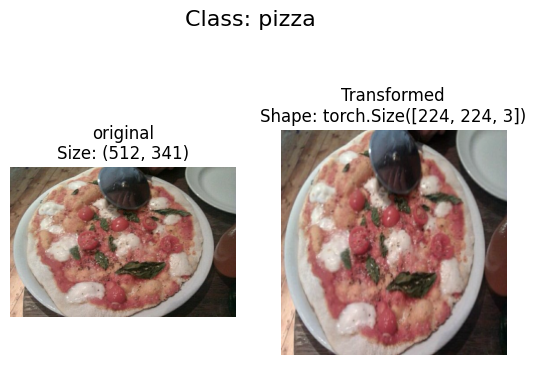

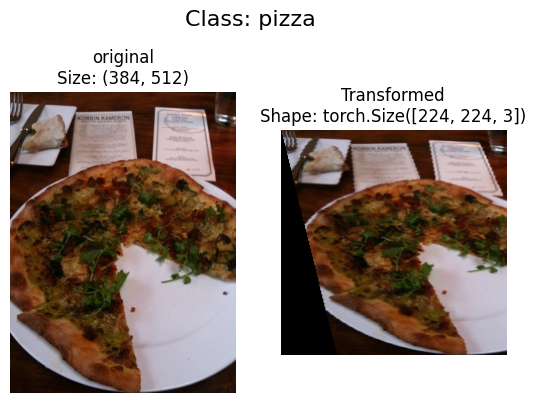

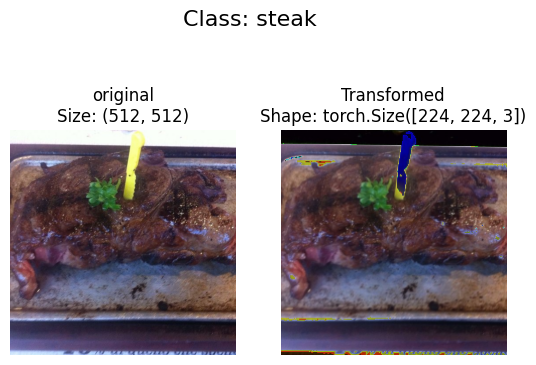

In [40]:
plot_transformed_images(image_paths=image_path_list,
                        transforms=train_transform,
                        n=3,
                        seed=None)

## Training models with normal data

### Normal transformation

In [41]:
# creating a simple transform without any augmentation
simple_transform = transforms.Compose([transforms.Resize(size=(64, 64)),
                                       transforms.ToTensor()])

In [42]:
import os
from torchvision import datasets
from torch.utils.data import DataLoader

train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

# turn the datasets in a dataloader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

### Building TinyVGG model_0

In [46]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)  # default stride value is the equal to the kernel size
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)  # default stride value is the equal to the kernel size
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units * 16 * 16, out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x
    # benefits the operator fusion - https://horace.io/brrr_intro.html
    # return self.classifier(self.conv_block_2(self.conv_block_1(x)))
    # this method consumes less time because it does not spend time to switch between computation and memory

In [47]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of colour channels in the image data
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [48]:
image_batch, label_batch = next(iter(train_dataloader_simple))
model_0(image_batch.to(device))

tensor([[0.0578, 0.0634, 0.0351],
        [0.0657, 0.0650, 0.0398],
        [0.0702, 0.0678, 0.0412],
        [0.0687, 0.0646, 0.0417],
        [0.0625, 0.0613, 0.0355],
        [0.0587, 0.0595, 0.0358],
        [0.0634, 0.0637, 0.0376],
        [0.0653, 0.0615, 0.0376],
        [0.0678, 0.0621, 0.0349],
        [0.0620, 0.0599, 0.0371],
        [0.0607, 0.0628, 0.0387],
        [0.0638, 0.0589, 0.0352],
        [0.0658, 0.0611, 0.0369],
        [0.0703, 0.0689, 0.0330],
        [0.0557, 0.0571, 0.0356],
        [0.0632, 0.0642, 0.0388],
        [0.0639, 0.0616, 0.0375],
        [0.0605, 0.0600, 0.0374],
        [0.0623, 0.0627, 0.0368],
        [0.0740, 0.0676, 0.0400],
        [0.0621, 0.0613, 0.0361],
        [0.0632, 0.0599, 0.0366],
        [0.0662, 0.0627, 0.0334],
        [0.0637, 0.0622, 0.0394],
        [0.0670, 0.0666, 0.0363],
        [0.0650, 0.0601, 0.0405],
        [0.0639, 0.0597, 0.0395],
        [0.0733, 0.0687, 0.0412],
        [0.0697, 0.0631, 0.0402],
        [0.062

In [49]:
from torchinfo import summary

summary(model_0, input_size=(BATCH_SIZE, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

### Creating train and test loops function

In [50]:
# train loop
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
  # put the model in train mode
  model.train()

  # setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # loop through dataloader
  for batch, (X, y) in enumerate(dataloader):
    # moving the data into the target device
    X, y = X.to(device), y.to(device)

    # forward pass
    y_pred = model(X)

    # calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backwards
    loss.backward()

    # optimizer step
    optimizer.step()

    # calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += ((y_pred_class==y).sum().item() / len(y_pred))

  # adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

# test loop
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  # put the model in eval mode
  model.eval()

  # setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # turn on inference mode
  with torch.inference_mode():
    # loop through dataloader batchs
    for batch, (X, y) in enumerate(dataloader):
      # send data to the target device
      X, y = X.to(device), y.to(device)

      # forward pass
      test_pred_logits = model(X)

      # calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item() / len(test_pred_labels))

  # adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [51]:
from tqdm.auto import tqdm

# creating a train() function that combines train_step() and test_step() functions
def train(model: torch.nn.Module,
          train_data: torch.utils.data.DataLoader,
          test_data: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device = device):
  # creating a empty results dictionary
  results = {
      'train_loss': [],
      'train_acc': [],
      'test_loss': [],
      'test_acc': []
  }

  # loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model = model,
                                       dataloader = train_data,
                                       loss_fn = loss_fn,
                                       optimizer = optimizer,
                                       device = device)

    test_loss, test_acc = test_step(model = model,
                                    dataloader = test_data,
                                    loss_fn = loss_fn,
                                    device = device)

    # printing out whats happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # keeping the current results into the record
    results['train_loss'].append(train_loss)
    results['train_acc'].append(train_acc)
    results['test_loss'].append(test_loss)
    results['test_acc'].append(test_acc)

  # returning the results after finishing the training
  return results

### Train and evaluate our model

In [52]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set number of epochs
NUM_EPOCHS = 20

# creating an instance of TinyVGG
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# setup loss funciton and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# start the timer
from timeit import default_timer as timer
start_time = timer()

# train model_0
model_0_results = train(model = model_0,
                        train_data = train_dataloader_simple,
                        test_data = test_dataloader_simple,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS,
                        device = device)

# end the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time - start_time: 0.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1078 | Train acc: 0.2578 | Test loss: 1.1362 | Test acc: 0.2604
Epoch: 1 | Train loss: 1.0846 | Train acc: 0.4258 | Test loss: 1.1622 | Test acc: 0.1979
Epoch: 2 | Train loss: 1.1153 | Train acc: 0.2930 | Test loss: 1.1695 | Test acc: 0.1979
Epoch: 3 | Train loss: 1.0990 | Train acc: 0.2891 | Test loss: 1.1343 | Test acc: 0.1979
Epoch: 4 | Train loss: 1.0990 | Train acc: 0.2930 | Test loss: 1.1434 | Test acc: 0.1979
Epoch: 5 | Train loss: 1.0964 | Train acc: 0.3125 | Test loss: 1.1483 | Test acc: 0.2604
Epoch: 6 | Train loss: 1.1187 | Train acc: 0.3203 | Test loss: 1.1423 | Test acc: 0.3125
Epoch: 7 | Train loss: 1.1015 | Train acc: 0.3555 | Test loss: 1.1051 | Test acc: 0.1979
Epoch: 8 | Train loss: 1.0893 | Train acc: 0.4688 | Test loss: 1.0687 | Test acc: 0.5417
Epoch: 9 | Train loss: 1.0683 | Train acc: 0.4023 | Test loss: 1.0169 | Test acc: 0.5417
Epoch: 10 | Train loss: 1.0487 | Train acc: 0.4062 | Test loss: 0.9751 | Test acc: 0.5729
Epoch: 11 | Train lo

### Ploting the results of the model_0

In [53]:
def plot_loss_curves(results: dict[str, List[float]]):
  """Plots training curve of a results dictionary."""
  # get the loss values of the results dictionary(train and test)
  loss = results['train_loss']
  test_loss = results['test_loss']

  # get the accuracy values of the results dictionary (train and test)
  accuracy = results['train_acc']
  test_accuracy = results['test_acc']

  # figure out how many epochs there ware
  epochs = range(len(results['train_loss']))

  # setup a plot
  plt.figure(figsize=(15,7))

  # plot the loss
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss curve")
  plt.legend()

  # plot the accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label="train_acc")
  plt.plot(epochs, test_accuracy, label="test_acc")
  plt.title("Accuracy curve")
  plt.legend()

  # show the plots
  plt.show()

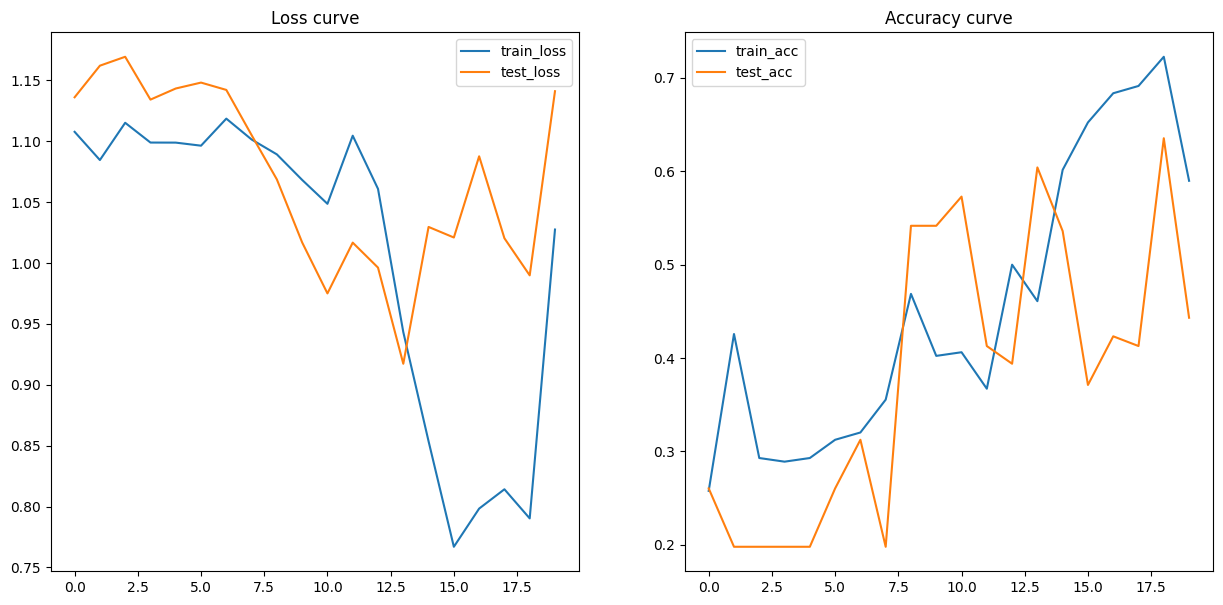

In [54]:
plot_loss_curves(model_0_results)

## Training models with augmented data

### Applying TrivialAugment on the data

In [55]:
# creating transform
from torchvision import transforms

# transforms for training data
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# transforms for test data
test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [56]:
# turn the image folders into datasets
from torchvision import datasets

# gettinh training data with augmentation
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)

# getting test data without augmentation
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_simple)

# turning datasets into a iterable dataloaders
from torch.utils.data import DataLoader
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_data

train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

### Constructing and training model_1

In [57]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)

summary(model_1, input_size=(BATCH_SIZE, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

In [58]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
NUM_EPOCHS = 20

# setting up loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# start the timer
from timeit import default_timer as timer
start_time = timer()

# train the model_1
model_1_results = train(model=model_1,
                        train_data=train_dataloader_augmented,
                        test_data=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)
end_time = timer()
print(f"Total training time for model_1: {end_time - start_time: 0.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1076 | Train acc: 0.2500 | Test loss: 1.1062 | Test acc: 0.2604
Epoch: 1 | Train loss: 1.0791 | Train acc: 0.4258 | Test loss: 1.1387 | Test acc: 0.2604
Epoch: 2 | Train loss: 1.0810 | Train acc: 0.4258 | Test loss: 1.1696 | Test acc: 0.2604
Epoch: 3 | Train loss: 1.1292 | Train acc: 0.3047 | Test loss: 1.1625 | Test acc: 0.2604
Epoch: 4 | Train loss: 1.0899 | Train acc: 0.4258 | Test loss: 1.1482 | Test acc: 0.2604
Epoch: 5 | Train loss: 1.0953 | Train acc: 0.3047 | Test loss: 1.1437 | Test acc: 0.2604
Epoch: 6 | Train loss: 1.0874 | Train acc: 0.4023 | Test loss: 1.1391 | Test acc: 0.1979
Epoch: 7 | Train loss: 1.1062 | Train acc: 0.2930 | Test loss: 1.1491 | Test acc: 0.1979
Epoch: 8 | Train loss: 1.1202 | Train acc: 0.3281 | Test loss: 1.1534 | Test acc: 0.3021
Epoch: 9 | Train loss: 1.0744 | Train acc: 0.5234 | Test loss: 1.0900 | Test acc: 0.3220
Epoch: 10 | Train loss: 1.0563 | Train acc: 0.4453 | Test loss: 1.0569 | Test acc: 0.5246
Epoch: 11 | Train lo

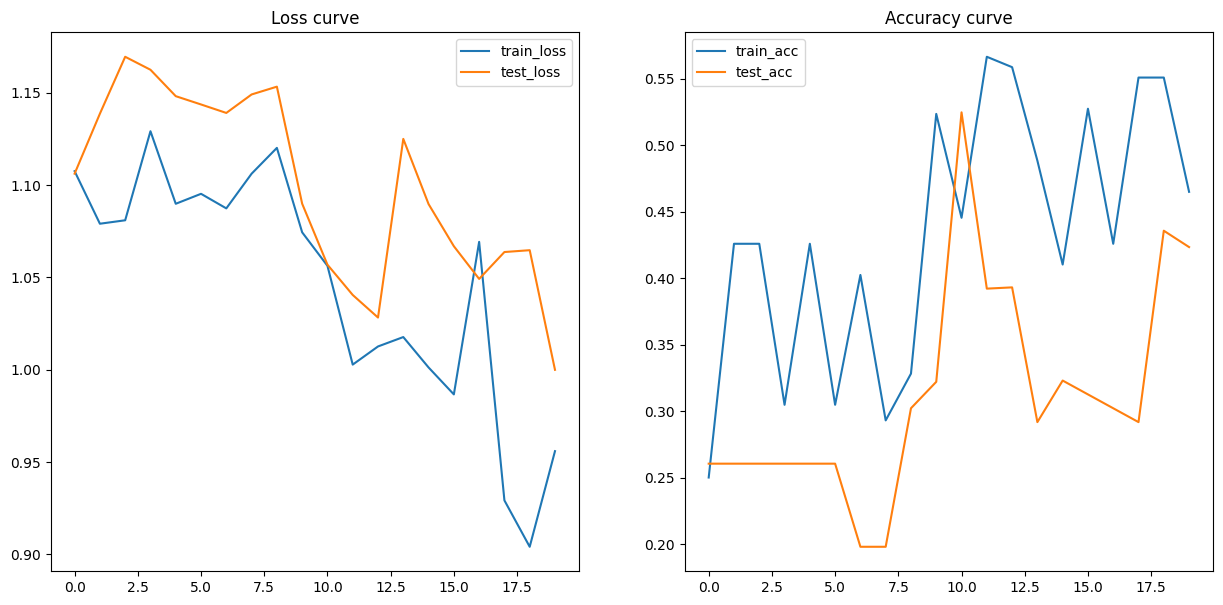

In [59]:
plot_loss_curves(model_1_results)